# Date: 31-01-2026

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report
from google.colab import drive

# Reading Dataset

In [6]:
iris_dataset = pd.read_csv('/content/drive/MyDrive/DM/datasets/iris.csv')

In [7]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Information about dataset

In [8]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Distribution of target feature

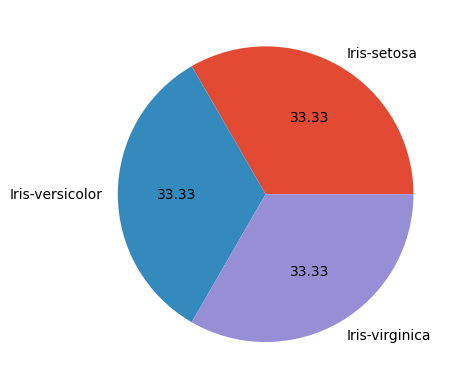

In [9]:
class_distribution = iris_dataset['class'].value_counts(normalize=True)
plt.style.use("ggplot")
plt.pie(class_distribution,autopct="%.2f",labels=iris_dataset['class'].unique())
plt.show()

# Encoding the target

In [10]:
encoder = LabelEncoder()
iris_dataset['class'] = encoder.fit_transform(iris_dataset['class'])
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Separating features from target

In [12]:
X = iris_dataset.iloc[:,:-1].copy()
y = iris_dataset['class'].copy()

# Splitting the dataset into test and training datasets

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

# Decision Tree Model

In [14]:
decision_tree = DecisionTreeClassifier()
model = decision_tree.fit(x_train,y_train)

In [15]:
y_pred = model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

# Confusion Matrix

In [16]:
conf_matrix = confusion_matrix(y_pred,y_test)


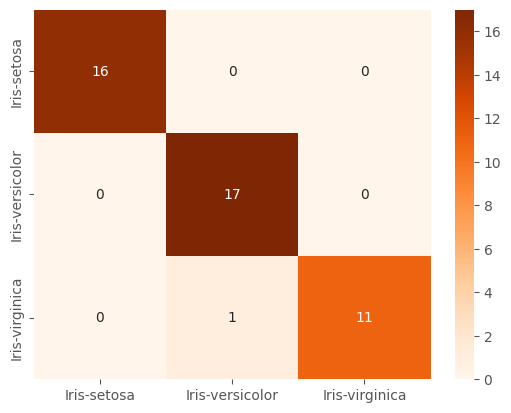

In [17]:
sns.heatmap(conf_matrix,annot=True,cmap=plt.cm.Oranges,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

# Classification Report

In [18]:
report = classification_report(y_test,y_pred,output_dict=True)
report = pd.DataFrame(report)
report

,0,1,2,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.916667,0.977778,0.972222,0.979630
recall,1.0,0.944444,1.000000,0.977778,0.981481,0.977778
f1-score,1.0,0.971429,0.956522,0.977778,0.975983,0.977943
support,16.0,18.000000,11.000000,0.977778,45.000000,45.000000


# Plotting the final decision tree

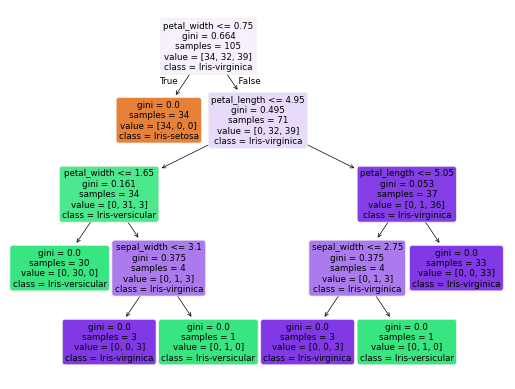

In [20]:
plot_tree(decision_tree,feature_names=X.columns,class_names=['Iris-setosa','Iris-versicular','Iris-virginica'],filled=True,rounded=True)
plt.show()